In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Storing stocks ticker symbols in list for 
tickers = ['GOOGL','MSFT','AMZN','META','CRM','NVDA','SMCI','INTC','AMD','AAPL']

## Company Information

### Create DataFrame to store Sector, Price to Earnings Ratio, Company Beta

In [ ]:
# Create an empty DataFrame to store the data
stock_data = pd.DataFrame(columns=['Ticker','CompanyName' ,'Sector', 'TrailingPE', 'Beta', 'MarketCap', 'AverageVolume'])

for stock_ticker in tickers:
    stock_info = yf.Ticker(stock_ticker).info
    
    # Extract information
    sector = stock_info.get('sector', 'N/A')
    longName = stock_info.get('longName', 'N/A')
    trailingPE = stock_info.get('trailingPE', 'N/A')
    beta = stock_info.get('beta', 'N/A')
    marketCap = stock_info.get('marketCap', 'N/A')
    volume = stock_info.get('averageVolume', 'N/A')
    
    # Append data to the DataFrame
    stock_data = pd.concat([stock_data, pd.DataFrame({
        'Ticker': [stock_ticker],
        'CompanyName': [longName],
        'Sector': [sector],
        'TrailingPE': [trailingPE],
        'Beta': [beta],
        'MarketCap': [marketCap],
        'AverageVolume': [volume]
    })], ignore_index=True)

    # Display information (optional)
    print(f"{stock_ticker}: {longName} - Sector: {sector}, TrailingPE: {trailingPE}, Beta: {beta}")

# Save DataFrame to CSV
stock_data.to_csv('stock_data.csv', index=False)

## Stock Prices

### Create DataFrame to store stock prices

In [ ]:
for ticker in tickers:
    data = yf.download(ticker, start='2013-01-01', group_by="Ticker")
    data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    
    data['MA50'] = data.Close.rolling(50).mean()
    data['MA200'] = data.Close.rolling(200).mean()
    
    data['Previous day close price'] = data.Close.shift(1)
    data['Change in price'] = data['Close'] - data['Previous day close price']
    
    data['Percent change in price'] = data.Close.pct_change()
    
    data['Previous day volume'] = data.Volume.shift(1)
    data['Change in volume'] = data['Volume'] - data['Previous day volume']
    
    data['Percent change in volume'] = data.Volume.pct_change()
    
    # Save DataFrame to CSV
    data.to_csv(f'ticker_{ticker}.csv')  


## Scatterplot for risk vs return

[*********************100%%**********************]  10 of 10 completed


C:\Users\Andrew\AppData\Local\Temp\ipykernel_26316\573513739.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(txt, (risk_return_df['Volatility'][i], risk_return_df['Return'][i]), fontsize=8)


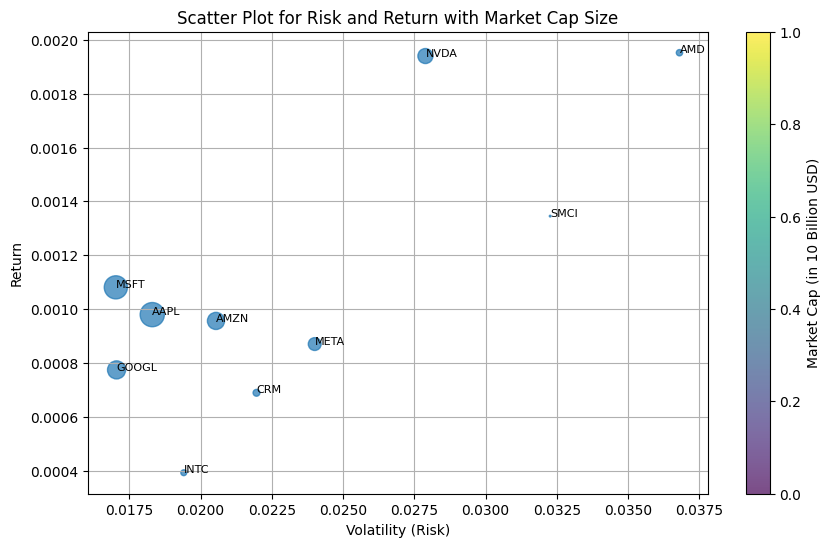

In [8]:
# Download historical stock price data
data = yf.download(tickers, start='2013-01-01', end='2023-01-01')['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Calculate volatility (standard deviation of returns)
volatility = returns.std()

# Get market capitalization information
market_cap = {ticker: yf.Ticker(ticker).info.get('marketCap', None) for ticker in tickers}

# Create a DataFrame with risk, return, and market cap
risk_return_df = pd.DataFrame({'Volatility': volatility, 'Return': returns.mean(), 'MarketCap': market_cap.values()}, index=tickers)

# Plot scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Size the markers based on market capitalization
sc = ax.scatter(risk_return_df['Volatility'], risk_return_df['Return'], s=risk_return_df['MarketCap'] / 1e10, alpha=0.7)

# Customize the chart
plt.title('Scatter Plot for Risk and Return with Market Cap Size')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.grid(True)

# Add labels for each point (ticker)
for i, txt in enumerate(tickers):
    ax.annotate(txt, (risk_return_df['Volatility'][i], risk_return_df['Return'][i]), fontsize=8)

# Add colorbar legend for market capitalization
cbar = plt.colorbar(sc)
cbar.set_label('Market Cap (in 10 Billion USD)')

plt.show()